# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Dynamics

<div style="background-color:lightyellow">

**Aufgabe 1:**

Wenn man die Intensität eines Sounds um 15 dB erhöht, um welchen Faktor hat sich die Intensität dann erhöht?

</div>

<div style="background-color:lightblue">

**Note:**

Auf der [Sengpiel](http://www.sengpielaudio.com/Rechner-schallpegel.htm)-Seite findet ihr, wenn ihr nach "Schallintensität I (in Luft)" sucht (`Ctrl-/Cmd-F`), die für uns relevante Umrechung.

Man kann es ausprobieren, indem man rechts 120 dB eingibt, was genau einer Intensität von $1 \mathrm{W/m^2}$ entspricht. Addiert man darauf 15 dB (= 135 dB), bekommt man denselben Faktor wie den, den wir ausgerechnet haben.

</div>

$15 = 10 \cdot log_{10}(I)$

$\frac{15}{10} = log_{10}(I)$

$10^{\frac{15}{10}} = I$ 


31.622776601683793


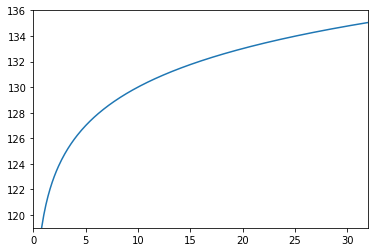

In [2]:
print(10 ** (15 / 10))

I = np.linspace(0, 50, 500)
sil = 10 * np.log10(I / (10 ** (-12)) + np.finfo(float).eps)

plt.plot(I, sil)
plt.ylim(119, 136)
plt.xlim(0, 32)
plt.show()

# I = 1
# sil = 10 * np.log10(I / (10 ** (-12)) + np.finfo(float).eps)
# print(sil)

# Load Audio

In [3]:
x, sr = lr.load('violin.mp3')
display(Audio(x, rate=sr))

# Fensterung

Heute haben wir die Funktion `lr.util.frame` kennengelernt, mit Hilfe derer wir das Audio ohne `for`-Loop fenstern können.

<br/>

<div style="background-color:lightyellow">

**Aufgabe 2:**

Schreibt eine Version der `calc_env`-Funktion, in der ihr `lr.util.frame` verwendet.

</div>

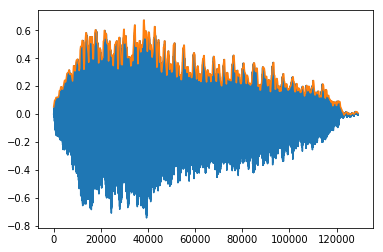

In [4]:
def calc_env(x, hop_length=200, window_size=400):

    # euer code
    x_framed = lr.util.frame(x, frame_length=window_size, hop_length=hop_length)
    amp_env = np.max(x_framed, axis=0) # wichtig: `axis=0`

    return amp_env

amp = calc_env(x)
plt.plot(x)
t = np.linspace(0, np.shape(x)[0], np.shape(amp)[0])
plt.plot(t, amp)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[[ 0  3  6  9 12 15]
 [ 1  4  7 10 13 16]
 [ 2  5  8 11 14 17]
 [ 3  6  9 12 15 18]]
[3 4 5 6]

[[ 0  1  2  3]
 [ 3  4  5  6]
 [ 6  7  8  9]
 [ 9 10 11 12]
 [12 13 14 15]
 [15 16 17 18]]
[3 4 5 6]
[3 4 5 6]


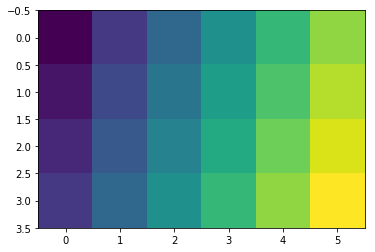

In [5]:
a = np.arange(20)
print(a)

print()

a_framed = lr.util.frame(a, 4, 3)
print(a_framed)
print(a_framed[:, 1])

print()

a_framed_in_sub_arrays = a_framed.T
print(a_framed_in_sub_arrays)
print(a_framed_in_sub_arrays[1, :])
print(a_framed_in_sub_arrays[1])


np.max(a_framed, axis=0)
plt.imshow(a_framed)
plt.show()

Im Zuge der sogenannten STFT (Short Time Fourier Transform), mit der wir ein Spektrogramm abbilden können, werden wir die einzelnen Fenster mit einer Fensterfunktion multiplizieren, um bestimmten Werten in unserem Fenster mehr Gewichtung in der darauffolgenden Berechnung zu geben, als anderen.

Sehr bekannt ist das sog. Von-Hann-Fenster:

$hann(n)={\frac {1}{2}}\left[1-\cos \left({\frac {2\pi n}{M-1}}\right)\right]$

<div style="background-color:lightyellow">

**Aufgabe 3:**

Schreibt eine Funktion `calc_hann` mithilfe derer wir die einzelnen Fenster eines fiktiven Signals gewichten (= multiplizieren) können.

Der Code-Block sollte folgenden plot ergeben:

![hanning-window](hann_plot.png)

</div>

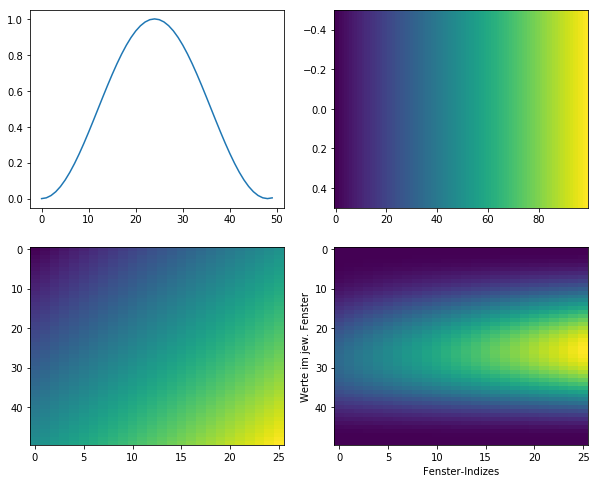

In [6]:
m = 50
def calc_hann(m=100):
    n = np.linspace(0, m, m)

    # euer Code:
    hann = 0.5 * (1 - np.cos((2 * np.pi * n) / (m - 1)))

    return hann

plt.figure(figsize=(5 * 2, 4 * 2))
plt.subplot(2, 2, 1)
hann = calc_hann(m)
plt.plot(hann)

x = np.arange(100)
# plt.plot(x)
x_framed = lr.util.frame(x, frame_length=m, hop_length=2)
hann_framed = np.tile(hann, (np.shape(x_framed)[1], 1)).T
x_windowed = hann_framed * x_framed
plt.subplot(2, 2, 4)
plt.imshow(x_windowed / np.max(np.abs(x_windowed)), aspect='auto', origin='upper')
plt.xlabel('Fenster-Indizes')
plt.ylabel('Werte im jew. Fenster')

plt.subplot(2, 2, 2)
plt.imshow(np.array([x]) / np.max(np.abs(x)), aspect='auto', origin='upper')

plt.subplot(2, 2, 3)
plt.imshow(np.array(x_framed) / np.max(np.abs(x_framed)), aspect='auto', origin='upper')

plt.show()

In [7]:
x, sr = lr.load('violin.mp3')
display(Audio(x, rate=sr))

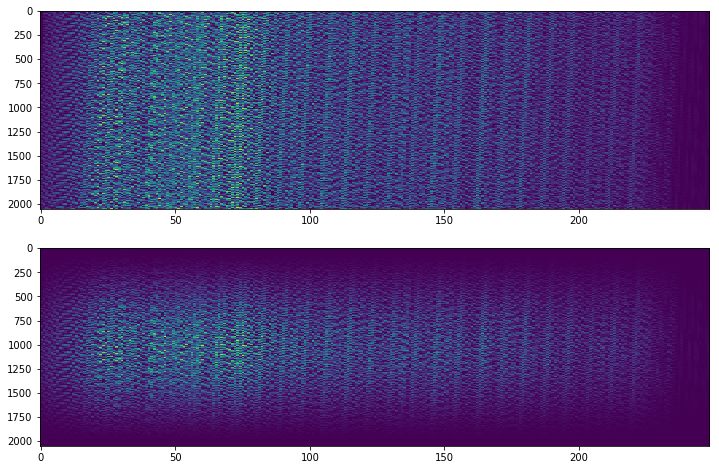

In [8]:
x_framed = lr.util.frame(x)
hann = calc_hann(2048)
hann_framed = np.tile(hann, (np.shape(x_framed)[1], 1)).T
x_windowed = hann_framed * x_framed

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.imshow(np.abs(x_framed), aspect='auto')
plt.subplot(2, 1, 2)
plt.imshow(np.abs(x_windowed), aspect='auto')